# Data Dictionary


survival - Survival - 0 = No, 1 = Yes

pclass 	 -      Ticket class        -    1 = 1st, 2 = 2nd, 3 = 3rd

sex 	  -      Sex 	


Age 	   -     Age in years 	

sibsp 	    -    # of siblings / spouses aboard the Titanic 	

parch 	     -   # of parents / children aboard the Titanic 	

ticket 	      -  Ticket number 	

fare 	  -      Passenger fare 	

cabin 	   -     Cabin number 	

embarked 	-    Port of Embarkation 	  -                                       C = Cherbourg, Q = Queenstown, S = Southampton




### Predict the survival on the Titanic disaster

In [292]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [293]:
df1= pd.read_csv("train.csv")
df2= pd.read_csv("test.csv")

df = pd.concat([df1, df2], axis = 0)

In [294]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [295]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [297]:
df.isnull().mean()*100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
dtype: float64

In [298]:
df.drop("Cabin", axis=1, inplace=True)

<Axes: xlabel='Embarked'>

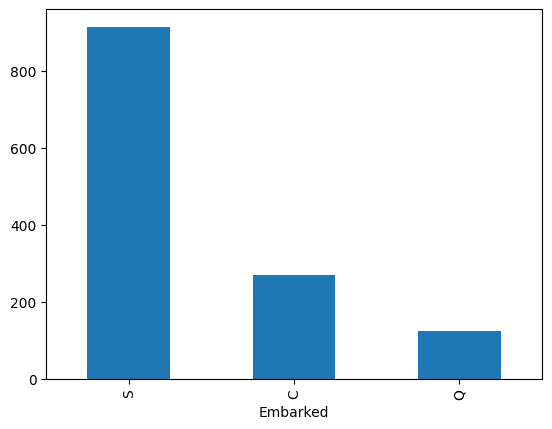

In [299]:
df["Embarked"].value_counts().plot(kind= "bar")


In [300]:
mode= df["Embarked"].mode()
df["Embarked"].fillna("mode", inplace= True)

C:\Users\aalok\AppData\Local\Temp\ipykernel_8392\79260154.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna("mode", inplace= True)


In [301]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Embarked     1309 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 122.7+ KB


In [302]:
df['Age_imputed'] = df['Age']

In [303]:
df['Age_imputed'][df['Age_imputed'].isnull()] = df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state= 42 ).values

C:\Users\aalok\AppData\Local\Temp\ipykernel_8392\727843545.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Age_imputed'][df['Age_imputed'].isnull()] = df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state= 42 ).values
C:\U

In [304]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         0
Age_imputed      0
dtype: int64

In [305]:
df.drop("Age", axis=1, inplace=True)

In [306]:
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [307]:
df.drop("Name", axis=1, inplace=True)

In [308]:
df.isnull().mean()*100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Embarked        0.000000
Age_imputed     0.000000
dtype: float64

In [309]:
df1 = df[:len(df1)]
df2 = df[len(df1):]

## Exploratory Data Analysis

In [310]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Ticket       891 non-null    object 
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
 9   Age_imputed  891 non-null    float64
dtypes: float64(3), int64(4), object(3)
memory usage: 76.6+ KB


In [311]:
df1.set_index("PassengerId")

,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age_imputed
PassengerId,,,,,,,,,
1,0.0,3,male,1,0,A/5 21171,7.2500,S,22.0
2,1.0,1,female,1,0,PC 17599,71.2833,C,38.0
3,1.0,3,female,0,0,STON/O2. 3101282,7.9250,S,26.0
4,1.0,1,female,1,0,113803,53.1000,S,35.0
5,0.0,3,male,0,0,373450,8.0500,S,35.0
...,...,...,...,...,...,...,...,...,...
887,0.0,2,male,0,0,211536,13.0000,S,27.0
888,1.0,1,female,0,0,112053,30.0000,S,19.0
889,0.0,3,female,1,2,W./C. 6607,23.4500,S,34.0


In [312]:
df_num= df1.select_dtypes(include=['number'])

In [313]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Age_imputed  891 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 55.7 KB


<Axes: >

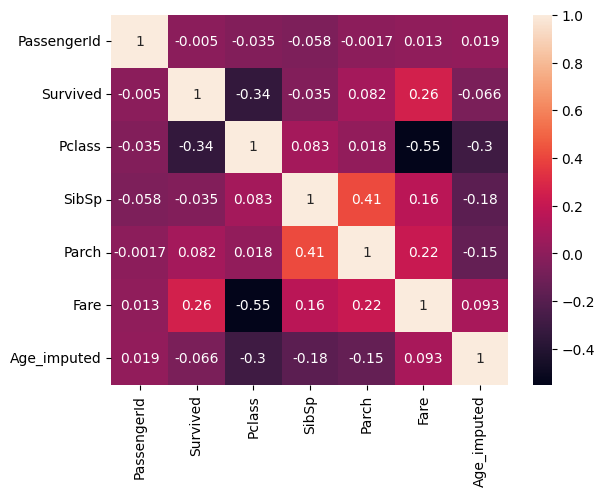

In [314]:
sns.heatmap(df_num.corr(), annot= True)

<Axes: >

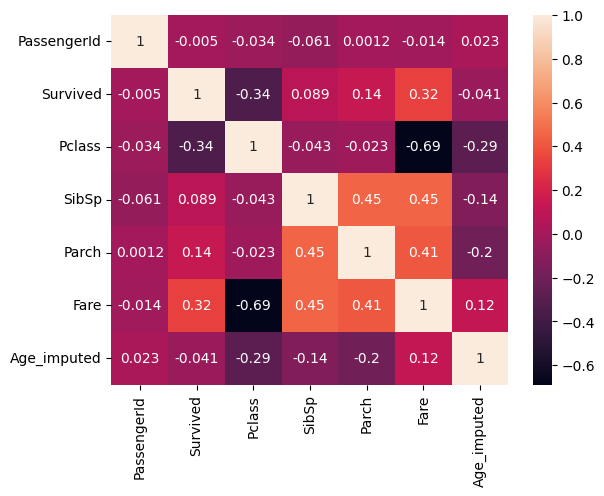

In [315]:
sns.heatmap(df_num.corr(method='spearman'), annot=True)

<Axes: >

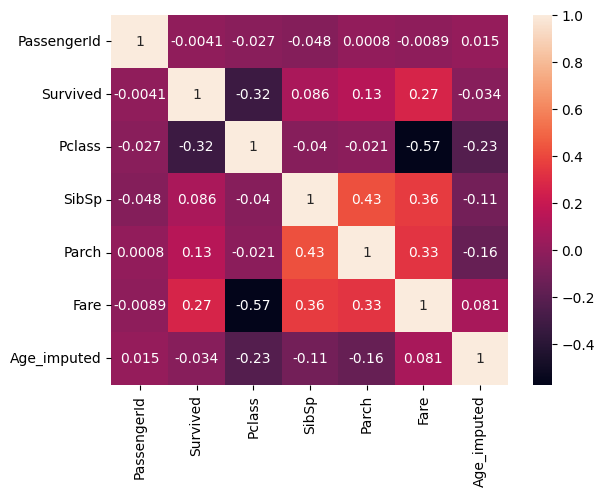

In [316]:
sns.heatmap(df_num.corr(method='kendall'), annot=True)

In [317]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [318]:
X = df_num.drop(columns=['Survived'])
y = df_num['Survived']

In [319]:
scalar= StandardScaler()
scalar.fit(df_num)
scalar.fit_transform(df_num)

array([[-1.73010796, -0.78927234,  0.82737724, ..., -0.47367361,
        -0.50244517, -0.52011859],
       [-1.72622007,  1.2669898 , -1.56610693, ..., -0.47367361,
         0.78684529,  0.60683796],
       [-1.72233219,  1.2669898 ,  0.82737724, ..., -0.47367361,
        -0.48885426, -0.23837945],
       ...,
       [ 1.72233219, -0.78927234,  0.82737724, ...,  2.00893337,
        -0.17626324,  0.32509882],
       [ 1.72622007,  1.2669898 , -1.56610693, ..., -0.47367361,
        -0.04438104, -0.23837945],
       [ 1.73010796, -0.78927234,  0.82737724, ..., -0.47367361,
        -0.49237783,  0.18422925]], shape=(891, 7))

In [320]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [321]:
X_train

,PassengerId,Pclass,SibSp,Parch,Fare,Age_imputed
331,332,1,0,0,28.5000,45.5
733,734,2,0,0,13.0000,23.0
382,383,3,0,0,7.9250,32.0
704,705,3,1,0,7.8542,26.0
813,814,3,4,2,31.2750,6.0
...,...,...,...,...,...,...
106,107,3,0,0,7.6500,21.0
270,271,1,0,0,31.0000,19.0
860,861,3,2,0,14.1083,41.0
435,436,1,1,2,120.0000,14.0


In [322]:
model_1 = LogisticRegression()
model_1.fit(X_train, y_train)

d:\Python_Projects\.conda\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [323]:
y_pred = model_1.predict(X_test)

In [324]:
accuracy_score(y_test, y_pred)

0.7262569832402235

In [325]:
model_2 = RandomForestClassifier()
model_2.fit(X_train, y_train)

RandomForestClassifier()

In [326]:
y_pred = model_2.predict(X_test)

accuracy_score(y_test, y_pred)

0.7094972067039106